In [7]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

import sys
sys.path.append('../bin/.')

import foregrounds_utils as fgutils

import yaml

import pathlib

In [8]:
configname = '../bin/simulationsconfigs/websky.yaml'
with open(configname, 'r') as f:
        data = yaml.safe_load(f)


path = pathlib.Path(data['path'])
original_maps_path = path/data['original_maps_path']

maps_path = path/data['maps_path']
alms_path = path/data['alms_path']

randomized_path = path/data['randomized_path']
randomized_alms_path = path/data['randomized_alms_path']

gaussianized_path = path/data['gaussianized_path']
gaussianized_alms_path = path/data['gaussianized_alms_path']


In [3]:
freq = data['nu']
cambversion = data['cambversion']

Fg = fgutils.Foregrounds(freq, freq, input_version = cambversion)

In [51]:
datacls = np.genfromtxt(f"../input/{cambversion}/{cambversion}_lenspotentialCls.dat")
lsth = datacls[1:, 0]
kkth = datacls[1:, 5]*(np.pi/2)

In [52]:
data['sky'].keys()

dict_keys(['lcmb', 'ulcmb', 'kappa', 'ksz', 'tsz', 'cib', 'radio', 'ksz_patchy'])

In [53]:
thspectra = {}
thspectra['kappa'] = (lsth, kkth)
thspectra['lcmb'] = (lsth, Fg.flensedTT(lsth))
thspectra['tsz'] = (lsth, Fg.ftSZ(lsth))
thspectra['cib'] = (lsth, Fg.fCIB(lsth))
thspectra['ksz'] = (lsth, Fg.fkSZ(lsth))
thspectra['radio'] = (lsth, Fg.fradioPoisson(lsth))

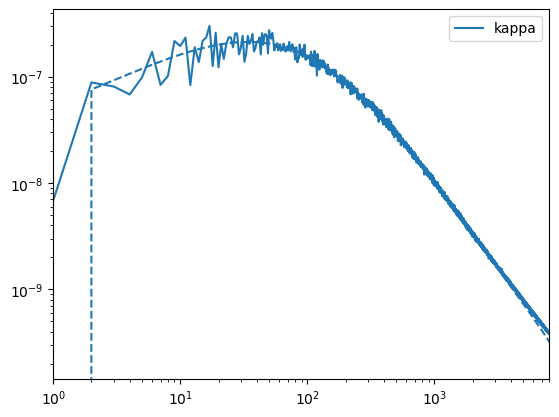

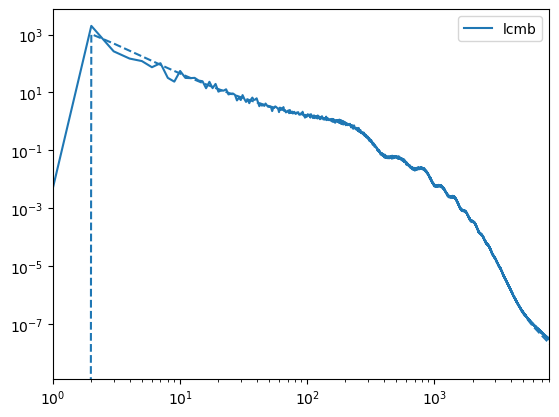

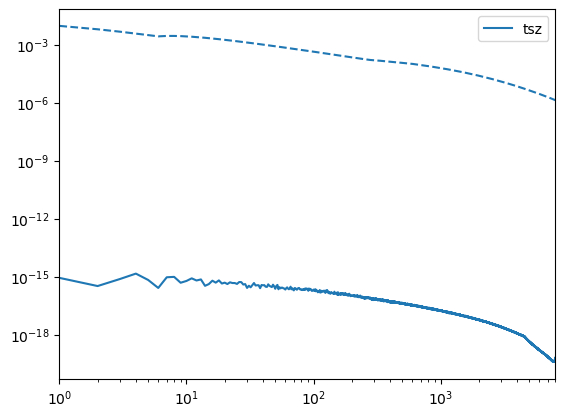

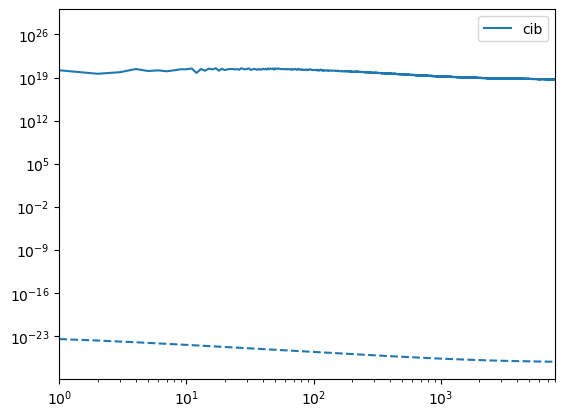

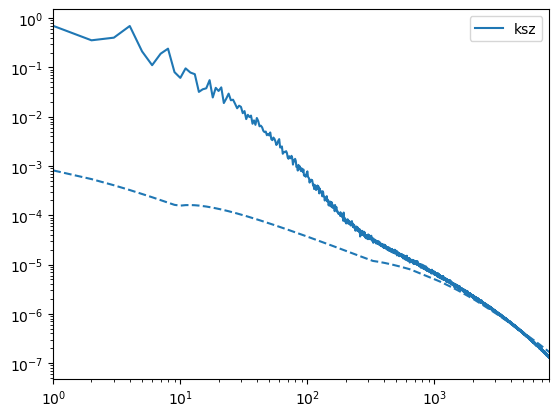

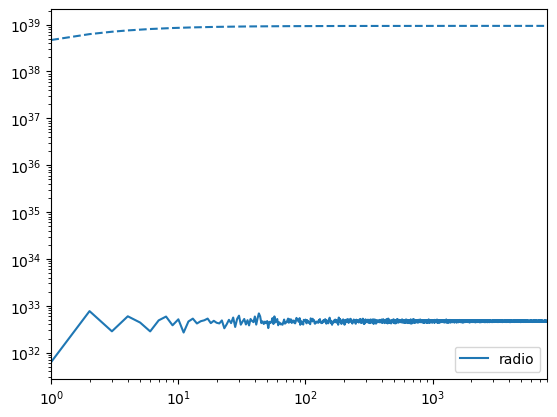

In [55]:
simsspectra = {}
for k in thspectra.keys():
    simsspectra[k] = hp.alm2cl(hp.read_alm(alms_path/f"{k}_alm.fits"))
    ls = np.arange(len(simsspectra[k]))
    p = plt.loglog(ls, simsspectra[k], label = k)
    plt.loglog(thspectra[k][0], thspectra[k][1], ls = '--', color = p[0].get_color())
    plt.xlim(1, 8000)
    plt.legend()
    plt.show()
